# Entregável 1 - visão computacional

<h3 style="color:red">CAIO EMMANUEL SOARES ROCHA</h3>

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.4.0 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

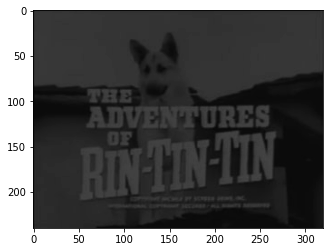

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

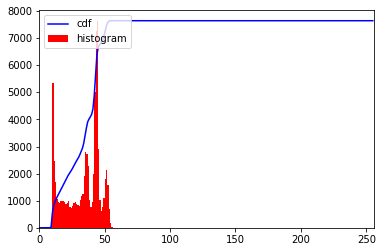

In [7]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

In [8]:
max_value = rintin_gray.flatten().max()
min_value = rintin_gray.flatten().min()
min_value, max_value

(8, 58)

In [9]:
def min_max_scaler(value, min_v, max_v, c=255):
    return c*(value-min_v)/(max_v-min_v)

In [10]:
saida = np.zeros((240, 320), dtype=np.uint8)

for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = min_max_scaler(rintin_gray[i][j], min_value, max_value)

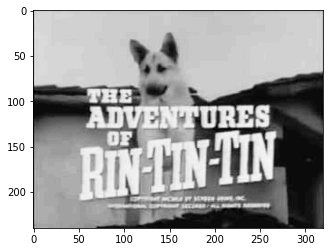

In [11]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


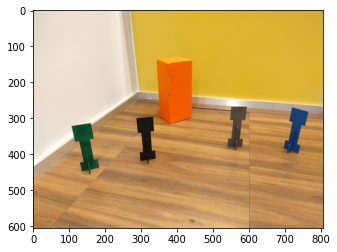

In [12]:
img = cv2.imread("cena_canto_sala.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

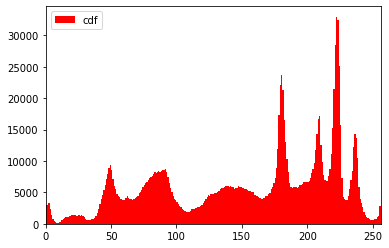

In [13]:
hist,bins = np.histogram(img_rgb.flatten(),256,[0,256])

plt.hist(img_rgb.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

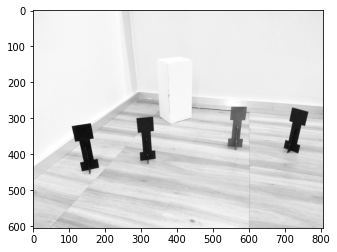

In [14]:
img_r = img_rgb[:,:,0]
plt.imshow(img_r, cmap='Greys_r')

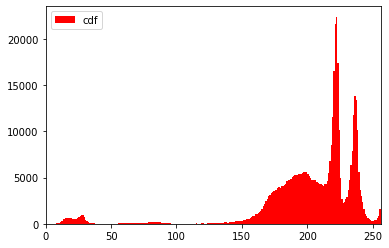

In [15]:
hist,bins = np.histogram(img_r.flatten(),256,[0,256])

plt.hist(img_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

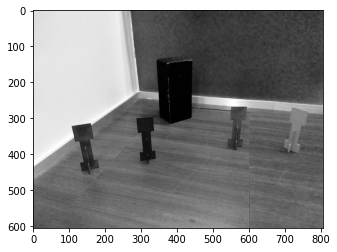

In [16]:
img_b = img_rgb[:,:,2]
plt.imshow(img_b, cmap='Greys_r')

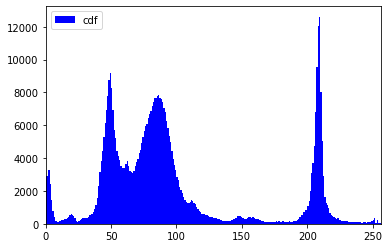

In [17]:
hist,bins = np.histogram(img_b.flatten(),256,[0,256])

plt.hist(img_b.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [18]:
saida = img_r.copy()

for i in range(img_r.shape[0]):
    for j in range(img_r.shape[1]):
        if img_b[i][j] < 20:
            saida[i][j] = img_r[i][j]
        else:
            saida[i][j] = 0

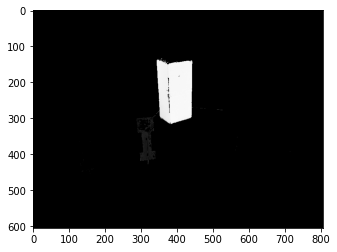

In [19]:
plt.imshow(saida, cmap="Greys_r")

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

(576, 1024)


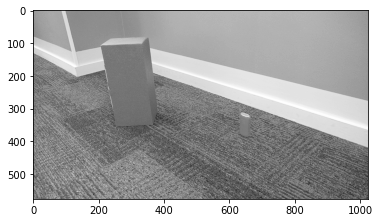

In [20]:
img = cv2.imread("hall_box_battery_atividade3.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
plt.imshow(img_gray, cmap='Greys_r')

In [21]:
saida = img_gray.copy()

for i in range(1,img_gray.shape[0]-1):
    for j in range(img_gray.shape[1]):
        saida[i][j] = abs(int(img_gray[i+1][j])-int(img_gray[i-1][j]))

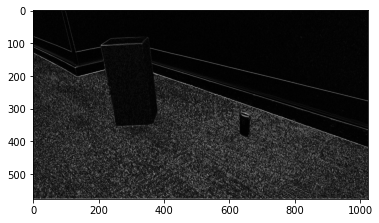

In [22]:
plt.imshow(saida, cmap="Greys_r")